In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [4]:
train_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
valid_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [5]:
# Read the images from the directory and resize them to 128x128
train = image_dataset_from_directory(train_path, image_size=(128, 128), label_mode='categorical')
valid = image_dataset_from_directory(valid_path, image_size=(128, 128), label_mode='categorical')

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


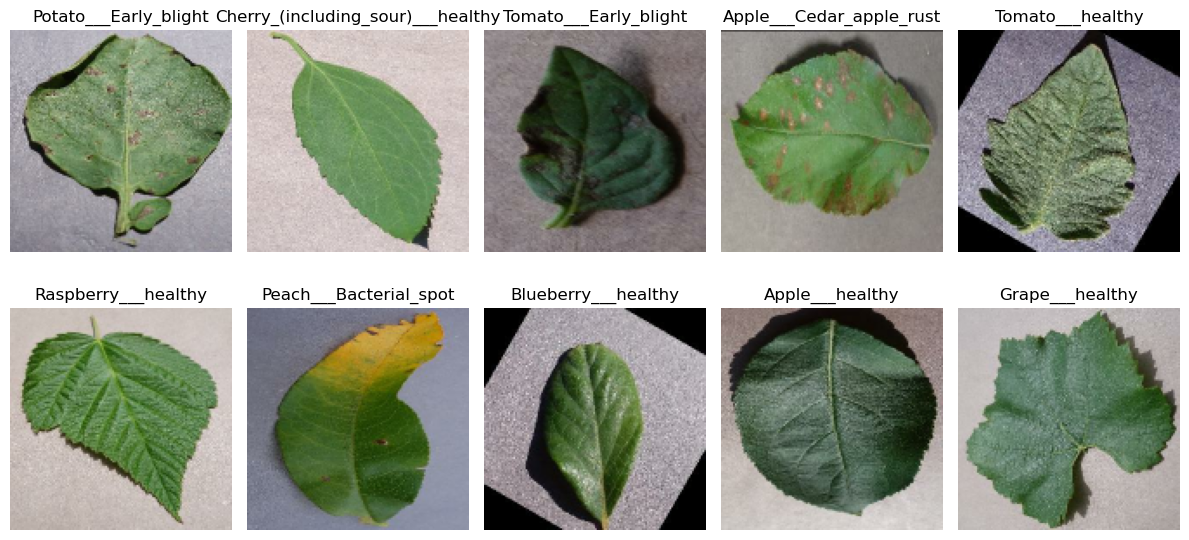

In [7]:

# Get a batch of images and labels from the dataset
image_batch, label_batch = next(iter(train))

# Convert one-hot encoded labels to class indices
class_names = train.class_names
label_batch = np.argmax(label_batch, axis=1)
labels = [class_names[label] for label in label_batch]

# Visualize the images and labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(image_batch[i].numpy().astype("uint8"))
    axes[i].set_title(labels[i])
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(3, 3))

model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(3, 3))

model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(3, 3))

model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(3, 3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(38, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(train, epochs=10, validation_data=valid)

Epoch 1/10
2197/2197 [==============================] - 873s 396ms/step - loss: 3.0548 - accuracy: 0.1463 - val_loss: 1.9917 - val_accuracy: 0.3988
Epoch 2/10
2197/2197 [==============================] - 849s 386ms/step - loss: 1.6134 - accuracy: 0.5159 - val_loss: 0.8731 - val_accuracy: 0.7314
Epoch 3/10
2197/2197 [==============================] - 853s 388ms/step - loss: 1.0289 - accuracy: 0.7138 - val_loss: 0.7405 - val_accuracy: 0.7881
Epoch 4/10
2197/2197 [==============================] - 844s 384ms/step - loss: 0.8002 - accuracy: 0.7865 - val_loss: 0.6291 - val_accuracy: 0.8184
Epoch 5/10
2197/2197 [==============================] - 843s 384ms/step - loss: 0.6932 - accuracy: 0.8178 - val_loss: 0.5174 - val_accuracy: 0.8513
Epoch 6/10
 612/2197 [=======>......................] - ETA: 9:17 - loss: 0.6392 - accuracy: 0.8306

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



2197/2197 [==============================] - 840s 382ms/step - loss: 0.6262 - accuracy: 0.8363 - val_loss: 0.5784 - val_accuracy: 0.8453
Epoch 7/10
2197/2197 [==============================] - 839s 382ms/step - loss: 0.5925 - accuracy: 0.8490 - val_loss: 0.6808 - val_accuracy: 0.8306
Epoch 8/10
2197/2197 [==============================] - 839s 382ms/step - loss: 0.5450 - accuracy: 0.8619 - val_loss: 0.4292 - val_accuracy: 0.8874
Epoch 9/10
2197/2197 [==============================] - 838s 381ms/step - loss: 0.5332 - accuracy: 0.8677 - val_loss: 0.5404 - val_accuracy: 0.8568
Epoch 10/10
2197/2197 [==============================] - 839s 382ms/step - loss: 0.5383 - accuracy: 0.8650 - val_loss: 0.4581 - val_accuracy: 0.8767


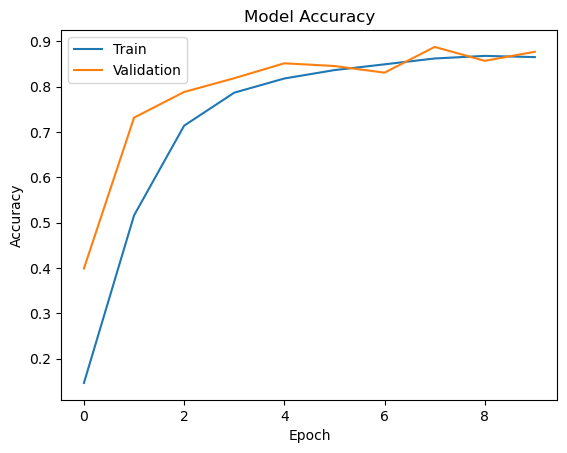

In [13]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
train_acc = history.history['accuracy'][-1]
valid_acc = history.history['val_accuracy'][-1]

print('Final Training Accuracy:', train_acc)
print('Final Validation Accuracy:', valid_acc)

Final Training Accuracy: 0.8649690747261047
Final Validation Accuracy: 0.8767356872558594
